# CS6650 (Web M.Tech): Smart Sensing for Internet of Things
#### Homework 2 (Part A) (Diwali 2024 Semester)
Submission Deadline : Nov 29th, 2024

---
Name: `Dipendu Ghosh`

Roll No: `CS23M509`

Email: `CS23M509@smail.iitm.ac.in`

---

### Android-based GNSS Measurements

<div style="display:flex; overflow: hidden;">
  <img src="./images/image6.png" width="400" height="250" style="margin:20px; object-fit: cover; object-position: top;">
  <div style="margin:20px;">
    <p>GNSS (Global Navigation Satellite System) today includes a variety of satellite constellations, including the GPS (American, global), GLONASS (Russian, global), BeiDou (Chinese, global), Galileo (European, global), NavIC (Indian, regional) and QZSS (Japanese, regional). Depending on your smartphone’s hardware capabilities, you can tap into signals from such constellations and update your location. Google provides an array of open-source <a href="https://github.com/google/gps-measurement-tools">tools</a> for performing GNSS-related measurements on commodity Android smartphones and analyzing such datasets.</p>
    <p>
    Download and install this app ( <a href="https://play.google.com/store/apps/details?id=com.google.android.apps.location.gps.gnsslogger&hl=en_IN&gl=US">GnssLogger App – Apps on Google Play</a>) to get started. Ensure the location permissions are provided to this app, and you have turned on your phone's location service (e.g., GPS). Turn on the "location" switch in the GNSSLogger app, as shown in the figure. Go to the next tab, "Log", and check whether you receive the GNSS specific diagnostic messages that include your location coordinates (latitude and longitude fix). <b>Make sure "Fused location" and "Network location" in the GNSS logger app are turned off before you start logging</b>. You can save the log data to a file and export this to the SD card or share it to your drive/email for offline use. Try playing with this app and make sure you are receiving the logs correctly. Cross-check the location coordinates reported by the app in Google maps.
    </p>
  </div>
</div>

---
Concentrate on the lines starting with keywords with “Fix” and `Status” (see GNSS Status [API](https://developer.android.com/reference/android/location/GnssStatus)). “Fix” related lines will provide you with the location coordinates of your phone. Only consider lines with “Fix, GPS” (raw GPS) and not “Fix, FLP” (fused location, uses IMU for correction).  <a id='measurements'></a>

- **Sample fix line (we are interested only in the red highlighted part)**: Fix, Provider, <span style="color:red">LatitudeDegrees, LongitudeDegrees</span>, AltitudeMeters, SpeedMps, AccuracyMeters, BearingDegrees, UnixTimeMillis, SpeedAccuracyMps, BearingAccuracyDegrees, elapsedRealtimeNanos.

    Example: Fix, GPS, <span style="color:red">12.997769, 80.240794</span>, -100.513824, 0.000000, 5.360000, 0.000000, 1616658843000, 0.49396357, 0.0, 1742433115036168

- **Sample status line (we are interested only in the red highlighted part)**: Status, UnixTimeMillis, SignalCount, SignalIndex, <span style="color:red">ConstellationType, Svid</span>, CarrierFrequencyHz, <span style="color:red">Cn0DbHz, AzimuthDegrees, ElevationDegrees, UsedInFix</span>, HasAlmanacData, HasEphemerisData, BasebandCn0DbHz
Example: Status, 1616658843000, 40, 38, <span style="color:red">6, 1</span>, 1575420032, <span style="color:red">15.00, 355.00, 37.00, 1</span>, 1, 0,

- **ConstellationType**: Only use GPS (for now, please ignore data from GLONASS, BeiDou etc., even if your phone supports it). Flag for GPS = 1, (see [this](https://developer.android.com/reference/android/location/GnssStatus#CONSTELLATION_GPS))
- **Svid**: Satellite ID
- **Cn0DbHz**: Signal Strength or SNR of the signal received from the particular satellite.
- **AzimuthDegrees (0 - 360) & Elevation Degrees (0 - 90)**: of the satellite ([Wiki](https://en.wikipedia.org/wiki/Azimuth))
- **UsedInFix**: Indicates whether this particular satellite was used for the latest fix for multilateration (remember, you need at least 4 of them?).

<div style="display:flex; flex-direction: column; align-items: center;">
        <figure style="margin: 20px; text-align: center; float: left;">
          <img src="./images/image3.png" width="600" height="400" >
          <figcaption>Fig. 1: Azimuth and Elevation</figcaption>
        </figure>
    </div>


### Tasks

First, create a directory following the `<Your_Roll>_CS6650H23` structure. Next, download this notebook and save it in the directory you created.


<div style="display:flex;">
  <img src="./images/image2.jpg" width="400" height="200" style="margin:20px;">
  <div style="margin:20px;">
    <p>Collect the <a href="#measurements">above</a> measurement logs at three distinct locations as indicated in the picture left.</p>
    <ol>
    <li>The smartphone is under the open sky a few meters from the entrance/door of your building.</li>
    <li> The smartphone is at the entrance (or some window) of your building, the sky is partially visible, and </li>
    <li> The smartphone is completely inside the building, very limited portion of the sky is visible maybe through the door/window.</li>
    </ol>
    <p>At each of these locations, collect GNSSLogger data for about 5 - 10 minutes (Perform the experiments on a sunny day with a clear sky). Now perform the following tasks.</p>
  </div>
</div>


1. [ ] [Attach sky photos of data collection locations (10 points)](#task1)
2. [ ] [Compute and plot location errors using haversine distance (15 points)](#task2)
3. [ ] [Analyze status entries before fix and their relation to error (45 points)](#task3)
4. [ ] [Show satellite statistics and SNR plots by azimuth and elevation (20 points)](#task4)
5. [ ] [Plot SNR by azimuth in angular space with satellite image (10 points)](#task5)

---

#### Guidelines for the Assignment
Before you start working on the assignment, please read the following instructions carefully:


- Clean and well-documented code is expected. Your code should be organized in a clear and readable manner, with each task separated into its own section of the notebook.

- There will be no separate PDF report required. Instead, provide a detailed but to-the-point discussion in the observation section for each task. The observation section (in Markdown, Refer to [Markdown-Cheatsheet](https://github.com/lifeparticle/Markdown-Cheatsheet)) includes a clear and concise description of the task, the approach used to solve it, assumptions, and inferences.

- Any extraneous information that does not address the question should be removed before submission. This will help to ensure that the answer is clear and easy to follow.

Failure to follow these practices will result in a penalty.

**Deadline: $29^{th}$, Nov, 2024**

#### Submission Instructions
- Compress the top-level directory (ZIP format) containing this notebook with your code and the data used for the assignment. (do not remove the outputs from the notebook cells)

- **You MUST refrain from consulting your homework code with others**. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.

- Submissions after the deadline will not be entertained.


<div class="alert alert-block alert-success">
    <b>Tip</b>: Our recommendation to the students is to begin the assignment as soon as possible. If you have any doubts, please fill out the <a href="https://forms.gle/oMSkBsijAdWFS8rm7">Google Form</a> with the necessary information and the instructor will address all concerns in the next class.
</div>


In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import median
import pandas as pd
from tabulate import tabulate

sns.set_theme()
cmap = sns.color_palette()

In [16]:
fix_header_map = {
    "Fix": 0,
    "Provider": 1,
    "LatitudeDegrees": 2,
    "LongitudeDegrees": 3,
    "AltitudeMeters": 4,
    "SpeedMps": 5,
    "AccuracyMeters": 6,
    "BearingDegrees": 7,
    "UnixTimeMillis": 8,
    "SpeedAccuracyMps": 9,
    "BearingAccuracyDegrees": 10,
    "elapsedRealtimeNanos": 11,
    "VerticalAccuracyMeters": 12,
    "MockLocation": 13,
    "NumberOfUsedSignals": 14,
    "VerticalSpeedAccuracyMps": 15,
    "SolutionType": 16
}

filtered_fix_header_map = {
    "LatitudeDegrees": 0,
    "LongitudeDegrees": 1,
    "UnixTimeMillis": 2,
}

status_header_map = {
    "Status": 0,
    "UnixTimeMillis": 1,
    "SignalCount": 2,
    "SignalIndex": 3,
    "ConstellationType": 4,
    "Svid": 5,
    "CarrierFrequencyHz": 6,
    "Cn0DbHz": 7,
    "AzimuthDegrees": 8,
    "ElevationDegrees": 9,
    "UsedInFix": 10,
    "HasAlmanacData": 11,
    "HasEphemerisData": 12,
    "BasebandCn0DbHz": 13
}

filtered_status_header_map = {
    "UnixTimeMillis": 0,
    "ConstellationType": 1,
    "Svid": 2,
    "Cn0DbHz": 3,
    "AzimuthDegrees": 4,
    "ElevationDegrees": 5,
    "UsedInFix": 6,
}

log_file_paths = [
    "dipendu_data/logs/1_sky_view_open/gnss_log_2024_11_10_14_01_07.txt",
    "dipendu_data/logs/2_sky_view_partial/gnss_log_2024_11_10_13_43_00.txt",
    "dipendu_data/logs/3_sky_view_limited/gnss_log_2024_11_10_13_14_52.txt"
]

titles = [
    "Open",
    "Partial",
    "Limited"
]

all_fix_data = []
all_status_data = []

log_files_metadata = []

for log_file_path, title in zip(log_file_paths, titles):
    log_dir = os.path.dirname(log_file_path)
    fix_file_path = os.path.join(log_dir, "fix.txt")
    status_file_path = os.path.join(log_dir, "status.txt")
    if os.path.exists(fix_file_path):
        os.remove(fix_file_path)
    if os.path.exists(status_file_path):
        os.remove(status_file_path)
    fix_data = []
    status_data = []

    with open(log_file_path, 'r') as log_file, \
         open(fix_file_path, 'w') as fix_file, \
         open(status_file_path, 'w') as status_file:
        
        for line in log_file:
            if line.startswith("Fix,GPS,"):
                fields = line.strip().split(',')
                try:
                    latitude = float(fields[fix_header_map["LatitudeDegrees"]])
                    longitude = float(fields[fix_header_map["LongitudeDegrees"]])
                    unix_time_millis = int(fields[fix_header_map["UnixTimeMillis"]])
                    
                    fix_file.write(f"{latitude},{longitude},{unix_time_millis}\n")
                    fix_data.append({"LatitudeDegrees": latitude, "LongitudeDegrees": longitude, "UnixTimeMillis": unix_time_millis})
                except IndexError:
                    print(f"Error processing line (missing data): {line}")
            elif line.startswith("Status,"):
                # Split the line into fields
                fields = line.strip().split(',')
                try:
                    constellation_type = int(fields[status_header_map["ConstellationType"]])
                    used_in_fix = int(fields[status_header_map["UsedInFix"]])
                    if constellation_type == 1 and used_in_fix == 1:
                        unix_time_millis = fields[status_header_map["UnixTimeMillis"]]
                        if unix_time_millis == '':
                            unix_time_millis = np.iinfo(np.int64).min
                        else:
                            unix_time_millis = int(unix_time_millis)
                        svid = int(fields[status_header_map["Svid"]])
                        cn0_dbhz = float(fields[status_header_map["Cn0DbHz"]])
                        azimuth_degrees = float(fields[status_header_map["AzimuthDegrees"]])
                        elevation_degrees = float(fields[status_header_map["ElevationDegrees"]])
                        
                        status_file.write(f"{unix_time_millis},{constellation_type},{svid},{cn0_dbhz},{azimuth_degrees},{elevation_degrees},{used_in_fix}\n")
                        status_data.append({
                            "UnixTimeMillis": unix_time_millis,
                            "ConstellationType": constellation_type,
                            "Svid": svid,
                            "Cn0DbHz": cn0_dbhz,
                            "AzimuthDegrees": azimuth_degrees,
                            "ElevationDegrees": elevation_degrees,
                            "UsedInFix": used_in_fix
                        })
                except IndexError:
                    print(f"Error processing status line (missing data): {line}")
    
    unique_svids = {status["Svid"] for status in status_data}
    print(f"Number of unique Svids followed by the unique Svids when Sky View is {title} \t {len(unique_svids)} \t {unique_svids}")
    
    all_fix_data.append(fix_data)
    all_status_data.append(status_data)
    
    log_metadata = {
        "title": title,
        "fix_log_file_path": fix_file_path,
        "status_log_file_path": status_file_path
    }
    
    log_files_metadata.append(log_metadata)
    
    # print(f"Processed logs when Sky View is {title}.")

# Display the metadata for each log file
# for metadata in log_files_metadata:
#     print(metadata)


Number of unique Svids followed by the unique Svids when Sky View is Open 	 9 	 {3, 4, 7, 8, 9, 16, 26, 27, 31}
Number of unique Svids followed by the unique Svids when Sky View is Partial 	 7 	 {3, 4, 9, 16, 26, 27, 31}
Number of unique Svids followed by the unique Svids when Sky View is Limited 	 8 	 {3, 4, 9, 16, 26, 27, 28, 31}


### Task 1: Attach sky photos of data collection locations [10 points] <a id='task1'></a>
Attach photos of the three locations with the phone, where data is collected, particularly the exposure to the sky.


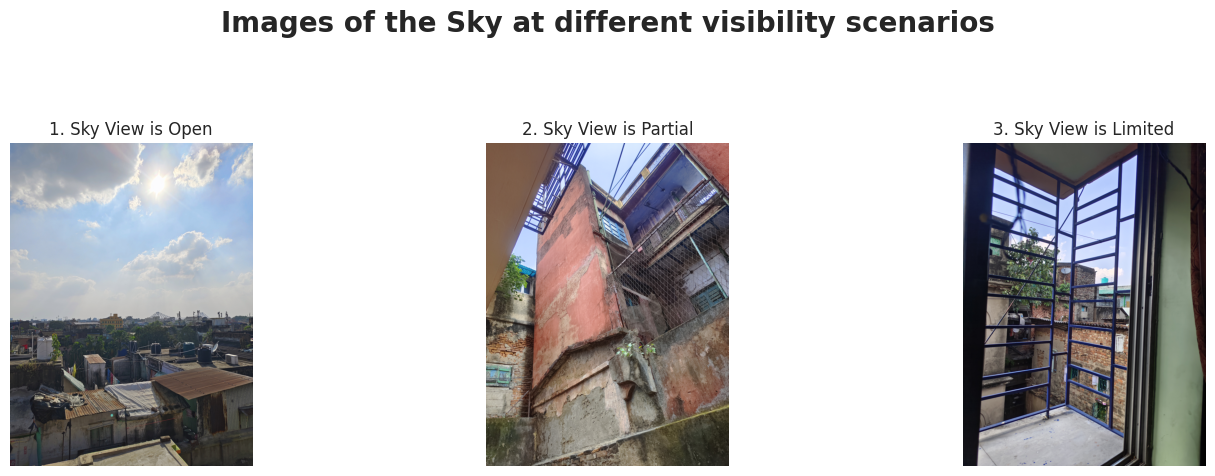

In [17]:
images = [
    {"title": "Open", "path": "dipendu_data/images/1_sky_view_open/IMG_20241110_141155.jpg"},
    {"title": "Partial", "path": "dipendu_data/images/2_sky_view_partial/IMG_20241110_135352.jpg"},
    {"title": "Limited", "path": "dipendu_data/images/3_sky_view_limited/IMG_20241110_132521.jpg"}
]

num_images = len(images)

plt.figure(figsize=(5 * num_images, 5))
plt.suptitle("Images of the Sky at different visibility scenarios\n", fontsize=20, fontweight="bold")

for i, image_info in enumerate(images):
    img = Image.open(image_info["path"])
    
    plt.subplot(1, num_images, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{i + 1}. Sky View is {image_info['title']}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


##### Observations Task 1

Edit this section to put your observations.

### Task 2: Compute and plot location errors using haversine distance [15 points] <a id='task2'></a>
Calculate the mean location coordinates for all three locations. Assume those three locations as the `groundtruth`. Compute the error for each location fix sample, which is the distance between the location sample and the groundtruth location. You must use haversine distance ([Wiki](https://en.wikipedia.org/wiki/Haversine_formula)). Plot the CDF (cumulative distribution function) of these errors for the three locations. Comment on the variance of the three distributions.


Groundtruth (mean latitude and longitude for each instance):
[(22.594844537066667, 88.36178276501666), (22.5948486197, 88.36189112626666), (22.594945618666667, 88.36173525221666)]
Errors when Sky View is Open:
[1.3339883153325738, 1.3284424271616027, 1.323933363269855, 1.3172061916547801, 1.3093699852565301, 1.3026432583747174, 1.2948782520222506, 1.288367507083468, 1.2828959139544729, 1.276241827581253, 1.2706968967867536, 1.2651520960323048, 1.259532123180481, 1.2550214835072877, 1.248219639035963, 1.2414919362406642, 1.234764478935364, 1.2292914053647819, 1.2226368311758484, 1.2159087723744808, 1.20814508910921, 1.2003816640305325, 1.1926185025401426, 1.1858161666187144, 1.1790883149631157, 1.173469905830215, 1.1702153142233958, 1.164669864066553, 1.1591245505228542, 1.1525453415393971, 1.1469253529190742, 1.1390876485611963, 1.131250129329056, 1.1234869071948228, 1.1166847818669954, 1.1122483331971322, 1.1078119751825939, 1.1023412312326564, 1.1000485710453543, 1.0979053837002066, 

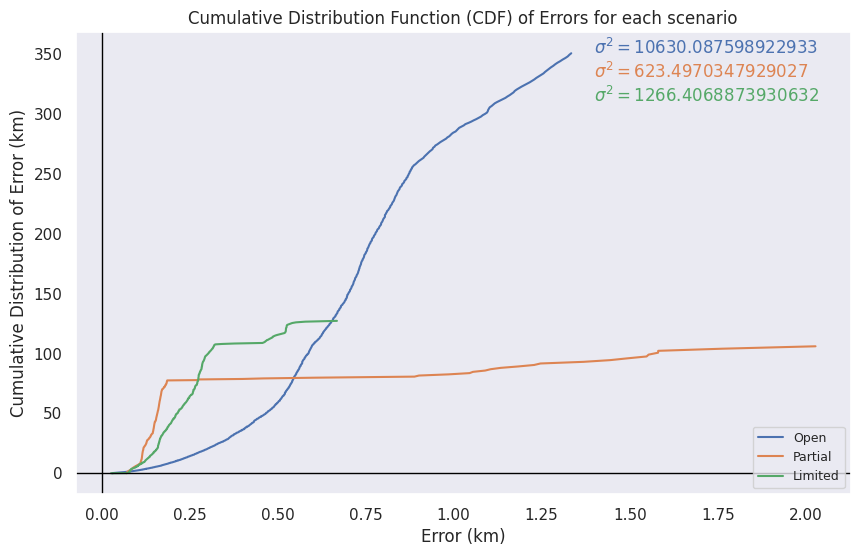

Variance of errors 0.09596751940767287
Variance of CDF 10630.087598922933
Variance of errors 0.048945223285152356
Variance of CDF 623.4970347929027
Variance of errors 0.010703655178696904
Variance of CDF 1266.4068873930632


In [18]:
radius_earth_km = 6371.0

def haversineDistance(latitude1, longitude1, latitude2, longitude2):
    latitude1, longitude1, latitude2, longitude2 = map(math.radians, [latitude1, longitude1, latitude2, longitude2])
    
    dlat = latitude2 - latitude1
    dlon = longitude2 - longitude1
    a = math.sin(dlat / 2)**2 + math.cos(latitude1) * math.cos(latitude2) * math.sin(dlon / 2)**2
    central_angle = 2 * math.asin(math.sqrt(a))
    distance_km = radius_earth_km * central_angle
    distance_m = distance_km * 1000
    return distance_m

groundtruth_per_scenario = []

distance_errors_per_fix_per_scenario = []

for log_data, title in zip(all_fix_data, titles):
    latitudes = [entry["LatitudeDegrees"] for entry in log_data]
    longitudes = [entry["LongitudeDegrees"] for entry in log_data]
    mean_latitude = sum(latitudes) / len(latitudes)
    mean_longitude = sum(longitudes) / len(longitudes)
    groundtruth_per_scenario.append((mean_latitude, mean_longitude))
    distance_error_per_fix = []

    for latitude, longitude in zip(latitudes, longitudes):
        harvesine_distance = haversineDistance(latitude, longitude, mean_latitude, mean_longitude)
        distance_error_per_fix.append(harvesine_distance)
    
    distance_errors_per_fix_per_scenario.append(distance_error_per_fix)

print("Groundtruth (mean latitude and longitude for each instance):")
print(groundtruth_per_scenario)

for errors, title in zip(distance_errors_per_fix_per_scenario, titles):
    print(f"Errors when Sky View is {title}:")
    print(errors)

variances = []
cdf_variances = []

plt.figure(figsize=(10, 6))
for i, (errors, title) in enumerate(zip(distance_errors_per_fix_per_scenario, titles)):
    sorted_errors = np.sort(errors)
    cumulative_distribution = np.cumsum(sorted_errors)

    variance = np.var(errors)
    variances.append(variance)
    
    cdf_variance = np.var(cumulative_distribution)
    cdf_variances.append(cdf_variance)

    plt.plot(sorted_errors, cumulative_distribution, label=f'{title}', color=cmap[i])
    plt.text(1.4, 350-i*20, rf"$\sigma^2 = {cdf_variance}$", color=cmap[i])

plt.xlabel('Error (km)')
plt.ylabel('Cumulative Distribution of Error (km)')
plt.title('Cumulative Distribution Function (CDF) of Errors for each scenario')
plt.legend(loc='lower right', fontsize=9)
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.grid()
plt.show()

for variance, cdf_variance in zip(variances, cdf_variances):
    print(f"Variance of errors {variance}\nVariance of CDF {cdf_variance}")

##### Observations Task 2

Edit this section to put your observations.

### Task 3: Analyze status entries before fix and their relation to error [45 points] <a id='task3'></a>
Check the `status` entries prior to receiving a `fix`.
1. How many satellites were used for the fix (check the UsedInFix entry for the satellites) for the three locations? (state the median # of satellites)
2. How does the distance error for a fix correlate to the number of satellites used for that fix? Show scatter plots for the three locations. Summarize your observations.
3. How does the distance error for a fix correlate to the average SNR (Cn0DbHz entry) of the satellites that were used in the fix? Show scatter plots for the three locations. Summarize your observations.


Unique SVID count per Scenario: [[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

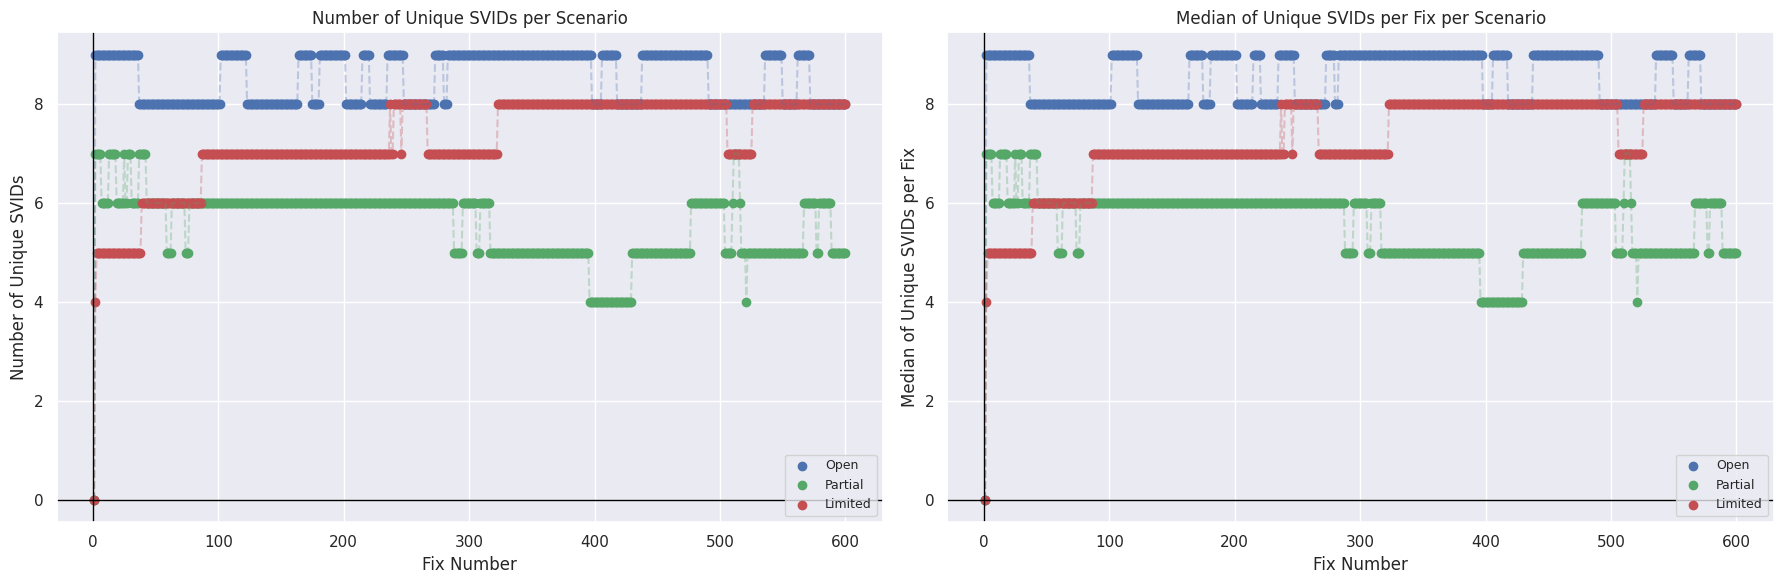

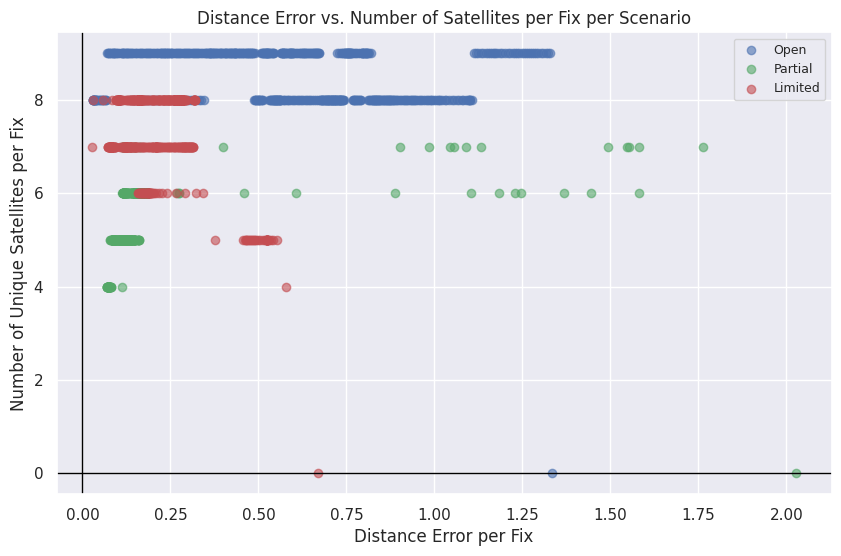

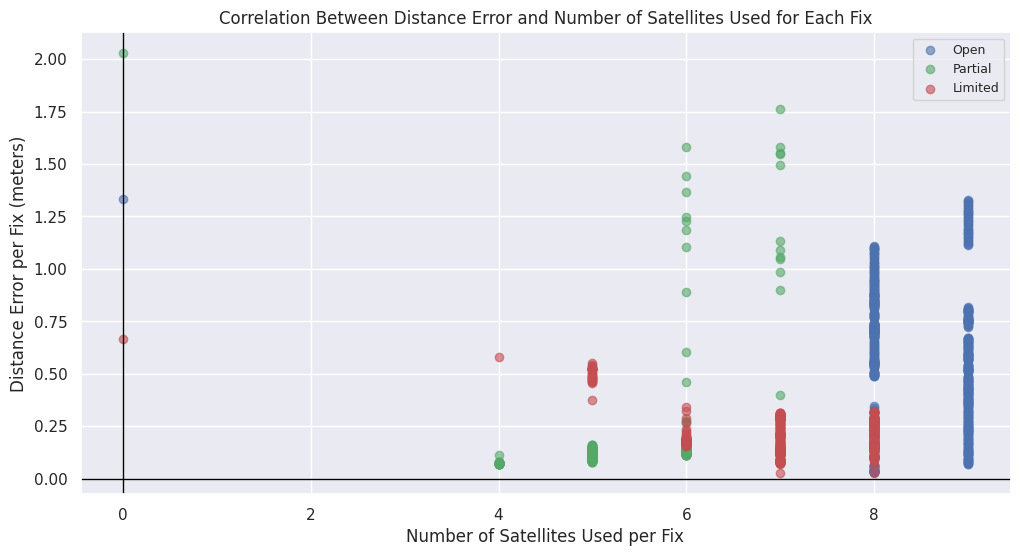

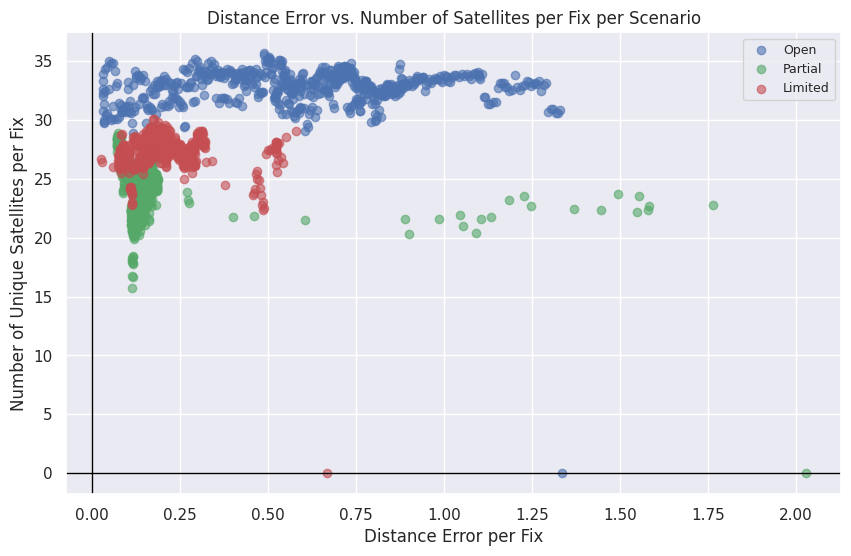

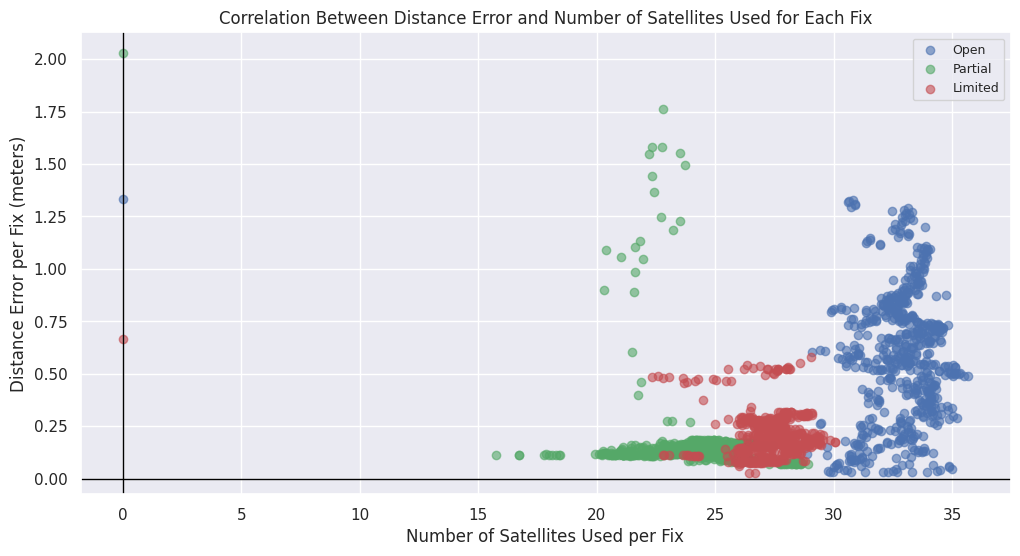

In [19]:
unique_svid_count_per_fix_per_scenario = []
median_satellites_per_fix_per_scenario = []
average_cn0dbhz_per_fix_per_scenario = []
median_satellites_per_scenario = []

for fix_data, status_data in zip(all_fix_data, all_status_data):
    unique_svid_counts = [] 
    median_satellites_per_fix = [] 
    average_cn0bdhz_per_fix = []

    min_timestamp = 0

    for fix in fix_data:
        max_timestamp = fix["UnixTimeMillis"]
        status_in_range = [
            status for status in status_data
            if min_timestamp <= status["UnixTimeMillis"] < max_timestamp and status["UsedInFix"] == 1
        ]
        unique_svids = {status["Svid"] for status in status_in_range}
        unique_svid_count = len(unique_svids)
        unique_svid_counts.append(unique_svid_count)
        median_satellites_per_fix.append(median([unique_svid_count]))
        cn0dbhz_values = [status["Cn0DbHz"] for status in status_in_range if "Cn0DbHz" in status]
        if cn0dbhz_values:
            avg_cn0 = sum(cn0dbhz_values) / len(cn0dbhz_values)
        else:
            avg_cn0 = 0 
        average_cn0bdhz_per_fix.append(avg_cn0)
        min_timestamp = max_timestamp

    unique_svid_count_per_fix_per_scenario.append(unique_svid_counts)
    median_satellites_per_fix_per_scenario.append(median_satellites_per_fix)
    average_cn0dbhz_per_fix_per_scenario.append(average_cn0bdhz_per_fix)  # Store the average Cn0DbHz per fix
    median_satellites_per_scenario.append(median(unique_svid_counts))

print("Unique SVID count per Scenario:", unique_svid_count_per_fix_per_scenario)
print("Median number of satellites per Fix per Scenario:", median_satellites_per_fix_per_scenario)
print("Average Cn0DbHz per Fix per Scenario:", average_cn0dbhz_per_fix_per_scenario)
print("Median number of satellites per Scenario:", median_satellites_per_scenario)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
for idx, (unique_svid_counts, title) in enumerate(zip(unique_svid_count_per_fix_per_scenario, titles)):
    fix_numbers = list(range(1, len(unique_svid_counts) + 1))
    color = colors[idx % len(colors)]
    ax1.scatter(fix_numbers, unique_svid_counts, color=color, label=f'{title}')
    ax1.plot(fix_numbers, unique_svid_counts, linestyle='--', color=color, alpha=0.3)
ax1.set_xlabel("Fix Number")
ax1.set_ylabel("Number of Unique SVIDs")
ax1.set_title("Number of Unique SVIDs per Scenario")
ax1.legend(loc='lower right', fontsize=9)
ax1.axhline(y=0, color='black', linewidth=1)
ax1.axvline(x=0, color='black', linewidth=1)
ax1.grid(True)
for idx, (median_counts, title) in enumerate(zip(median_satellites_per_fix_per_scenario, titles)):
    fix_numbers = list(range(1, len(median_counts) + 1))
    color = colors[idx % len(colors)]
    ax2.scatter(fix_numbers, median_counts, color=color, label=f'{title}')
    ax2.plot(fix_numbers, median_counts, linestyle='--', color=color, alpha=0.3)
ax2.set_xlabel("Fix Number")
ax2.set_ylabel("Median of Unique SVIDs per Fix")
ax2.set_title("Median of Unique SVIDs per Fix per Scenario")
ax2.legend(loc='lower right', fontsize=9)
ax2.axhline(y=0, color='black', linewidth=1)
ax2.axvline(x=0, color='black', linewidth=1)
ax2.grid(True)
plt.tight_layout()
plt.show()

colors = ['b', 'g', 'r']
plt.figure(figsize=(10, 6))
for idx, (errors, svid_counts, title) in enumerate(zip(distance_errors_per_fix_per_scenario, unique_svid_count_per_fix_per_scenario, titles)):
    color = colors[idx % len(colors)]
    plt.scatter(errors, svid_counts, color=color, label=f'{title}', alpha=0.6)
plt.xlabel("Distance Error per Fix")
plt.ylabel("Number of Unique Satellites per Fix")
plt.title("Distance Error vs. Number of Satellites per Fix per Scenario")
plt.legend(loc='upper right', fontsize=9)
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.grid(True)
plt.show()

colors = ['b', 'g', 'r']
plt.figure(figsize=(12, 6))
for idx, (errors, svid_counts, title) in enumerate(zip(distance_errors_per_fix_per_scenario, unique_svid_count_per_fix_per_scenario, titles)):
    color = colors[idx % len(colors)]
    plt.scatter(svid_counts, errors, color=color, label=f'{title}', alpha=0.6)
plt.xlabel("Number of Satellites Used per Fix")
plt.ylabel("Distance Error per Fix (meters)")
plt.title("Correlation Between Distance Error and Number of Satellites Used for Each Fix")
plt.legend(loc='upper right', fontsize=9)
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.grid(True)
plt.show()

colors = ['b', 'g', 'r']
plt.figure(figsize=(10, 6))
for idx, (errors, svid_counts, title) in enumerate(zip(distance_errors_per_fix_per_scenario, average_cn0dbhz_per_fix_per_scenario, titles)):
    color = colors[idx % len(colors)] 
    plt.scatter(errors, svid_counts, color=color, label=f'{title}', alpha=0.6)
plt.xlabel("Distance Error per Fix")
plt.ylabel("Number of Unique Satellites per Fix")
plt.title("Distance Error vs. Number of Satellites per Fix per Scenario")
plt.legend(loc='upper right', fontsize=9)
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.grid(True)
plt.show()

colors = ['b', 'g', 'r']
plt.figure(figsize=(12, 6))
for idx, (errors, svid_counts, title) in enumerate(zip(distance_errors_per_fix_per_scenario, average_cn0dbhz_per_fix_per_scenario, titles)):
    color = colors[idx % len(colors)]
    plt.scatter(svid_counts, errors, color=color, label=f'{title}', alpha=0.6)
plt.xlabel("Number of Satellites Used per Fix")
plt.ylabel("Distance Error per Fix (meters)")
plt.title("Correlation Between Distance Error and Number of Satellites Used for Each Fix")
plt.legend(loc='upper right', fontsize=9)
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.grid(True)
plt.show()


##### Observations Task 3

Edit this section to put your observations.

### Task 4: Show satellite statistics and SNR plots by azimuth and elevation [20 points] <a id='task4'></a>
Only consider the `status` instances where a particular satellite was used for a location fix.
1. Show a table for the `Svid`, `Average Azimuth`, `Average Elevation`, `Average SNR` (each row for a specific satellite).
1. Plot `Average Azimuth` (0 - 360 degrees) with `Average SNR` (see Note)
1. Plot `Average Elevation` (0, 90 degrees) with `Average SNR`



<div class="alert alert-block alert-info">
    <div style="display:flex; margin:20px;">
        <img src="./images/image1.jpg" width="300" height="200" >
        <div style="margin:20px;">
            <h2> How to calculate the azimuth corresponding to the direction of the window or door?</h2>
            <p>Take the two points (Lat1, Lon1) and (Lat2, Lon2) and use <a href="https://www.fcc.gov/media/radio/distance-and-azimuths">this website</a>, or any other online azimuth calculator. Basically, the azimuth gives you the angle the black line makes with 0 degrees north.
            </p>
        </div>
    </div>
</div>

Scenario : Sky is Open
+--------+-------------------+---------------------+---------------+
|   Svid |   Average Azimuth |   Average Elevation |   Average SNR |
+========+===================+=====================+===============+
|      3 |          219.237  |             36.035  |       36.9363 |
+--------+-------------------+---------------------+---------------+
|      4 |          342.34   |             65.7616 |       27.2162 |
+--------+-------------------+---------------------+---------------+
|      7 |          294.222  |             16.68   |       34.2698 |
+--------+-------------------+---------------------+---------------+
|      8 |          160.778  |             38.4233 |       37.2001 |
+--------+-------------------+---------------------+---------------+
|      9 |          324      |             35.6357 |       31.5182 |
+--------+-------------------+---------------------+---------------+
|     16 |           29      |             49.6426 |       16.9116 |
+--------+-

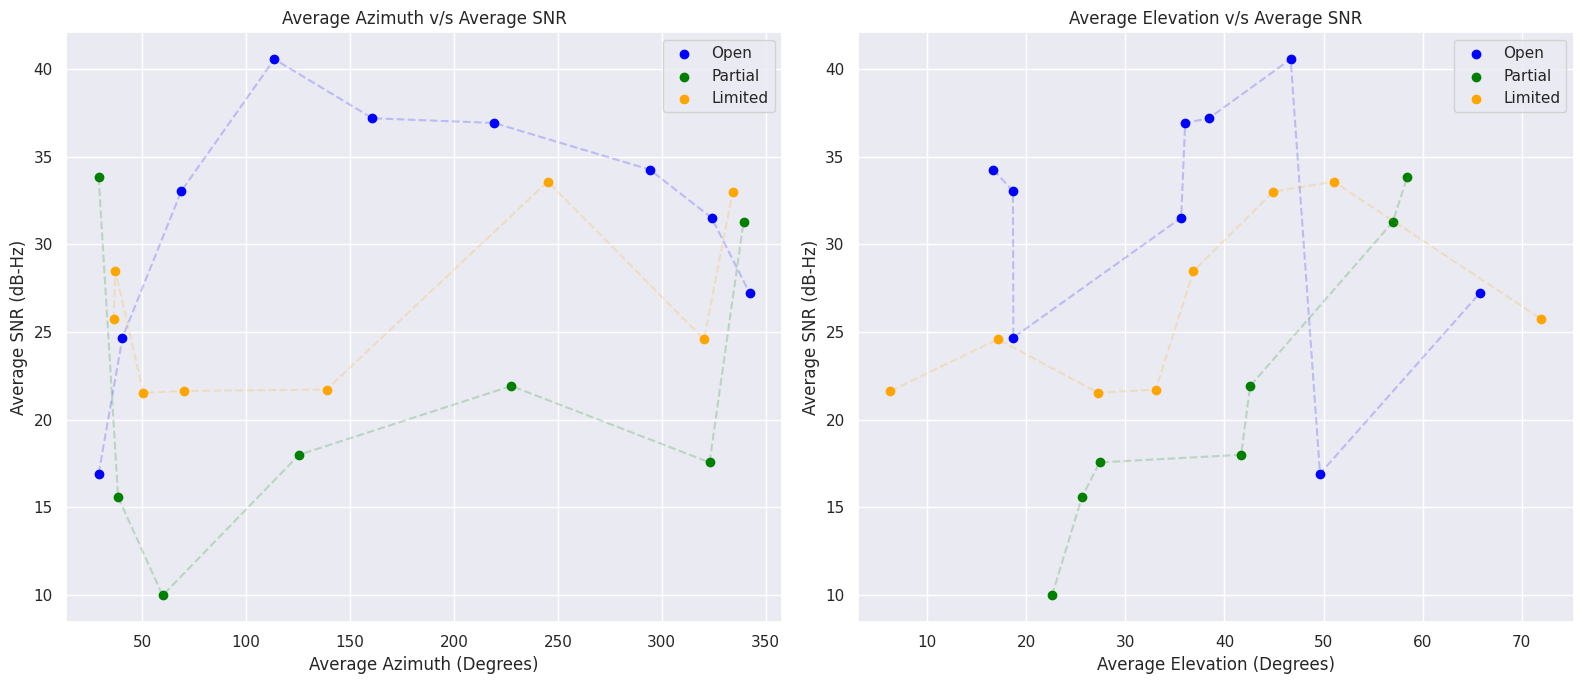

Point 1: Latitude = 22.5948486, Longitude = 88.3618911
Point 2: Latitude = 22.5948445, Longitude = 88.3617828


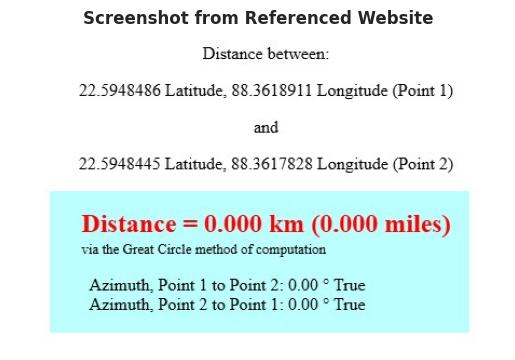

In [20]:
averaged_status_data_per_satellite_per_scenario = []
status_tables_per_scenario = []

for status_data in all_status_data:
    svid_data = {}

    for status in status_data:
        svid = status["Svid"]
        if svid not in svid_data:
            svid_data[svid] = {
                "Cn0DbHz": [],
                "AzimuthDegrees": [],
                "ElevationDegrees": []
            }
        svid_data[svid]["Cn0DbHz"].append(status["Cn0DbHz"])
        svid_data[svid]["AzimuthDegrees"].append(status["AzimuthDegrees"])
        svid_data[svid]["ElevationDegrees"].append(status["ElevationDegrees"])

    svid_averages = {}
    for svid in sorted(svid_data):
        values = svid_data[svid]
        svid_averages[svid] = {
            "AvgCn0DbHz": math.fsum(values["Cn0DbHz"]) / len(values["Cn0DbHz"]),
            "AvgAzimuthDegrees": math.fsum(values["AzimuthDegrees"]) / len(values["AzimuthDegrees"]),
            "AvgElevationDegrees": math.fsum(values["ElevationDegrees"]) / len(values["ElevationDegrees"])
        }

    averaged_status_data_per_satellite_per_scenario.append(svid_averages)

for i, avg_data in enumerate(averaged_status_data_per_satellite_per_scenario):
    table_data = {
        "Svid": [],
        "Average Azimuth": [],
        "Average Elevation": [],
        "Average SNR": []
    }

    for svid, averages in avg_data.items():
        table_data["Svid"].append(svid)
        table_data["Average Azimuth"].append(averages["AvgAzimuthDegrees"])
        table_data["Average Elevation"].append(averages["AvgElevationDegrees"])
        table_data["Average SNR"].append(averages["AvgCn0DbHz"])

    df = pd.DataFrame(table_data)
    df.sort_values("Svid", inplace=True)
    status_tables_per_scenario.append(df)

for i, (df, title) in enumerate(zip(status_tables_per_scenario, titles), start=1):
    print(f"Scenario : Sky is {title}")
    print(tabulate(df, headers="keys", tablefmt="grid", showindex=False))  # Use grid format for borders
    print("\n")

colors = ['blue', 'green', 'orange']
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
for i, (df, color, title) in enumerate(zip(status_tables_per_scenario, colors, titles), start=1):
    sorted_df = df.sort_values(by="Average Azimuth")
    axes[0].scatter(sorted_df["Average Azimuth"], sorted_df["Average SNR"], color=color, label=f'{title}', alpha=1)
    axes[0].plot(sorted_df["Average Azimuth"], sorted_df["Average SNR"], color=color, linestyle='--', alpha=0.2)
axes[0].set_xlabel("Average Azimuth (Degrees)")
axes[0].set_ylabel("Average SNR (dB-Hz)")
axes[0].set_title("Average Azimuth v/s Average SNR")
axes[0].legend()
axes[0].grid(True)
for i, (df, color, title) in enumerate(zip(status_tables_per_scenario, colors, titles), start=1):
    sorted_df = df.sort_values(by="Average Elevation")
    axes[1].scatter(sorted_df["Average Elevation"], sorted_df["Average SNR"], color=color, label=f'{title}', alpha=1)
    axes[1].plot(sorted_df["Average Elevation"], sorted_df["Average SNR"], color=color, linestyle='--', alpha=0.2)
axes[1].set_xlabel("Average Elevation (Degrees)")
axes[1].set_ylabel("Average SNR (dB-Hz)")
axes[1].set_title("Average Elevation v/s Average SNR")
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.show()

point_1 = groundtruth_per_scenario[1]
point_2 = groundtruth_per_scenario[0]

print(f"Point 1: Latitude = {point_1[0]:.7f}, Longitude = {point_1[1]:.7f}")
print(f"Point 2: Latitude = {point_2[0]:.7f}, Longitude = {point_2[1]:.7f}")

plt.figure()
img = Image.open("dipendu_data/images/azimuth_calculation/azimuth_calculation.jpg")
plt.imshow(img)
plt.title("Screenshot from Referenced Website", fontweight="bold")
plt.axis(False)
plt.show()

##### Observations Task 4

Edit this section to put your observations.

### Task 5: Plot SNR by azimuth in angular space with satellite image [10 points] <a id='task5'></a>

<!-- <div style="display: flex; justify-content: center;">
        <img src="./images/image4.jpg" width="300" height="300">
        <img src="./images/image5.png" width="400" height="300">
    <p style="float: right; margin-left: 10px;">
        See the figures to the left. Two example plots are also shown on the right for your reference. Either you can plot in the cartesian space or in the angular (R, theta) space. Magnitude of R can signify your SNR. To make it more interesting, you can superimpose the angular plot on a satellite image, say from Google maps (of course, you need to rotate the image to align the azimuths). This should show the effect of buildings, trees, obstacles on the SNR. Does your plot (particularly, for location 2, where the phone is kept on the window sill or door) peak for a certain azimuth? This azimuth should roughly match with the direction of the clear sky from that location.
    </p>
</div> -->

<div style="display: block; justify-content: center; align-items: center; margin: 20px">
  <div style="display: flex; justify-content: center; align-items: center;">
    <img src="./images/image4.jpg" width="300" height="300">
    <img src="./images/image5.png" width="400" height="300">
  </div>
  <p style="margin-left: 10px;">See the figures above. Two example plots are also shown on the right for your reference. Either you can plot in the cartesian space or in the angular (R, theta) space. Magnitude of R can signify your SNR. To make it more interesting, you can superimpose the angular plot on a satellite image, say from Google maps (of course, you need to rotate the image to align the azimuths). This should show the effect of buildings, trees, obstacles on the SNR. Does your plot (particularly, for location 2, where the phone is kept on the window sill or door) peak for a certain azimuth? This azimuth should roughly match with the direction of the clear sky from that location.</p>
</div>

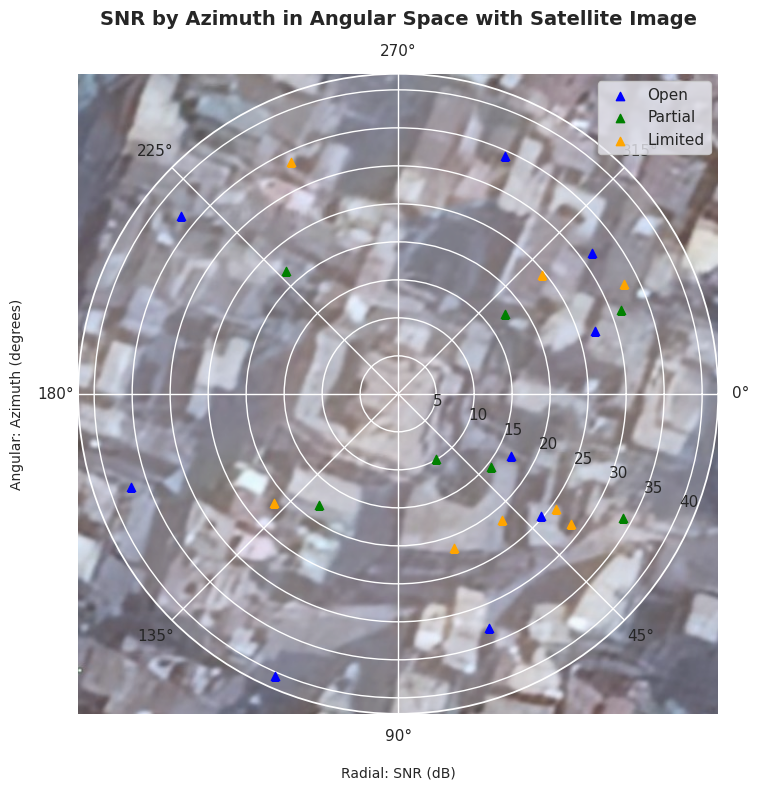

In [21]:
plt.figure(figsize=(8, 8))
fig = plt.gcf()

axes_coords = [0.1, 0.1, 0.8, 0.8]

ax_image = fig.add_axes(axes_coords)
ax_image.imshow(Image.open("dipendu_data/images/azimuth_calculation/my_location.jpg"), alpha=0.7, aspect="auto")
ax_image.axis("off")

ax_polar = fig.add_axes(axes_coords, projection="polar")
ax_polar.patch.set_alpha(0.2)
ax_polar.set_theta_direction(-1)

for i, (df, color, title) in enumerate(zip(status_tables_per_scenario, colors, titles), start=1):
    theta = np.radians(df["Average Azimuth"])
    r = df["Average SNR"]
    
    ax_polar.scatter(theta, r, color=color, marker="^", label=f'{title}')
    ax_polar.grid(True)
    
ax_polar.set_xlabel("\nRadial: SNR (dB)", fontsize=10)
ax_polar.set_ylabel("Angular: Azimuth (degrees)\n\n\n", fontsize=10)
plt.suptitle("SNR by Azimuth in Angular Space with Satellite Image", fontweight="bold", fontsize=14)
plt.legend()
plt.show()


##### Observations Task 5

Edit this section to put your observations.